<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Analysis</a></span></li><li><span><a href="#Check-for-outliers" data-toc-modified-id="Check-for-outliers-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Check for outliers</a></span></li><li><span><a href="#FEATURE-IMPORTANCE" data-toc-modified-id="FEATURE-IMPORTANCE-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>FEATURE IMPORTANCE</a></span></li><li><span><a href="#MODEL-SELECTION-AND-TRAINING" data-toc-modified-id="MODEL-SELECTION-AND-TRAINING-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>MODEL SELECTION AND TRAINING</a></span></li><li><span><a href="#TEST-DATA-RESULTS" data-toc-modified-id="TEST-DATA-RESULTS-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>TEST DATA RESULTS</a></span></li><li><span><a href="#REPORT" data-toc-modified-id="REPORT-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>REPORT</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

In [3]:
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.columns=['sepal_l','sepal_w','petal_l','petal_w','class']
df.loc[len(df.index)]=[5.1,3.5,1.4,0.2,'Iris-setosa']
df

,sepal_l,sepal_w,petal_l,petal_w,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


# Data Analysis

In [5]:
df.describe()

,sepal_l,sepal_w,petal_l,petal_w
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
import sklearn
from sklearn.model_selection import train_test_split

In [8]:
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


# Check for outliers

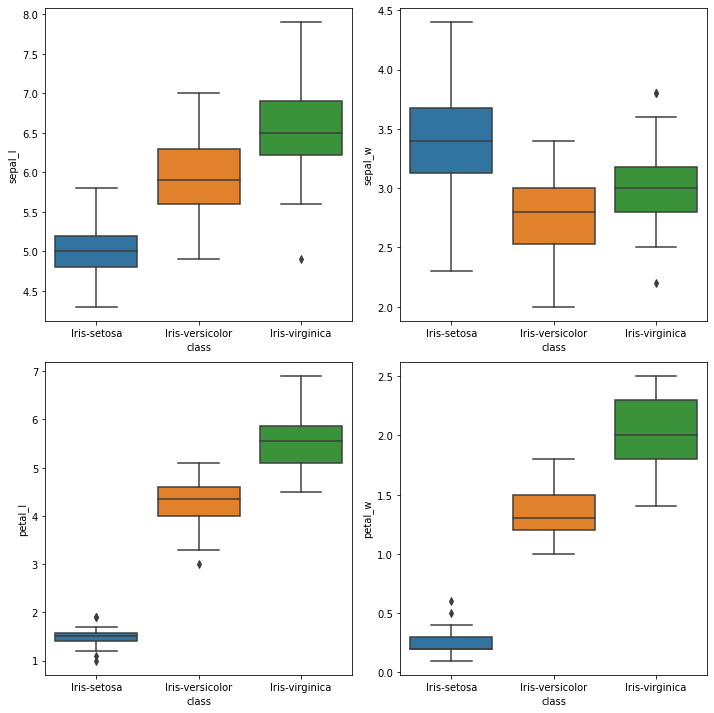

In [10]:
fig,axis=plt.subplots(2,2,figsize=(10,10))
sns.boxplot(x='class',y='sepal_l',data=df,order=species,ax=axis[0,0]);
sns.boxplot(x='class',y='sepal_w',data=df,order=species,ax=axis[0,1]);
sns.boxplot(x='class',y='petal_l',data=df,order=species,ax=axis[1,0]);
sns.boxplot(x='class',y='petal_w',data=df,order=species,ax=axis[1,1]);
fig.tight_layout(pad=1.0)

In [11]:
df["petal_w"] = np.where(df["petal_w"] <df['petal_w'].quantile(0.10), df['petal_w'].quantile(0.10),df['petal_w'])
df["sepal_w"] = np.where(df["sepal_w"] <df['sepal_w'].quantile(0.10), df['sepal_w'].quantile(0.10),df['sepal_w'])
df["sepal_l"] = np.where(df["sepal_l"] >df['sepal_l'].quantile(0.90), df['sepal_l'].quantile(0.90),df['sepal_l'])
df["sepal_w"] = np.where(df["sepal_w"] >df['sepal_w'].quantile(0.90), df['sepal_w'].quantile(0.90),df['sepal_w'])
df["petal_w"] = np.where(df["petal_w"] >df['petal_w'].quantile(0.90), df['petal_w'].quantile(0.90),df['petal_w'])
df["petal_l"] = np.where(df["petal_l"] >df['petal_l'].quantile(0.90), df['petal_l'].quantile(0.90),df['petal_l'])

df["sepal_l"] = np.where(df["sepal_l"] <df['sepal_l'].quantile(0.10), df['sepal_l'].quantile(0.10),df['sepal_l'])
df["petal_l"] = np.where(df["petal_l"] <df['petal_l'].quantile(0.10), df['petal_l'].quantile(0.10),df['petal_l'])

In [12]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

,sepal_l,sepal_w,petal_l,petal_w,class


# FEATURE IMPORTANCE

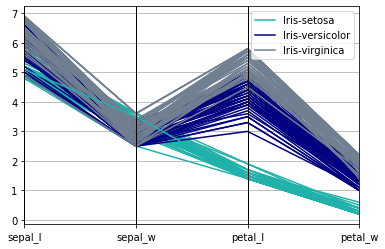

In [13]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(df,'class',color=['lightseagreen','navy','slategray'])

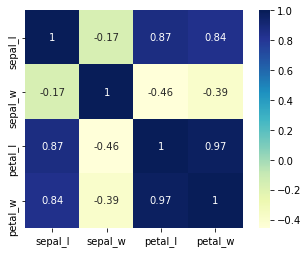

In [14]:
correlation=df.corr()
sns.heatmap(correlation,annot=True,square=True,cmap="YlGnBu")

In [15]:
x=np.array(df.drop(['class','sepal_w'],1))
y=np.array(df['class'])
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.2,random_state=42)

# MODEL SELECTION AND TRAINING

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [17]:
result={}
models = {}
#models['LDA']=LinearDiscriminantAnalysis()
models['KNN']=KNeighborsClassifier(n_neighbors=25)
models['CART']=DecisionTreeClassifier(max_depth=3,min_samples_split=70)
models['RFC']=RandomForestClassifier(max_depth=2,n_estimators=5)
models['SVM']=SVC(gamma='auto',C=0.06)
for key in models:
    kfold = StratifiedKFold(n_splits=4,shuffle=True)
    cv_results = cross_val_score(models[key], x_train, y_train, cv=kfold, scoring='accuracy')
    result[key]=cv_results.mean()
print("Model and Accuracy:-")
chosen_one = max(result, key=result.get)     
result


Model and Accuracy:-


{'KNN': 0.9583333333333334,
 'CART': 0.6749999999999999,
 'RFC': 0.9000000000000001,
 'SVM': 0.9500000000000001}

In [18]:
import pickle

In [19]:
with open("chosen_model.pickle",'wb') as f:
    pickle.dump(models[chosen_one],f)

In [20]:
pickle_in = open("chosen_model.pickle", "rb")
final_model = pickle.load(pickle_in)

In [21]:
final_model.fit(x_train,y_train)
predictions = final_model.predict(x_test)

# TEST DATA RESULTS

In [22]:
from prettytable import PrettyTable
myTable=PrettyTable(["Actual","sepal_l","petal_l","petal_w","Prediction"])
for x in range(len(predictions)):
    if(y_test[x]==predictions[x]):
         myTable.add_row([y_test[x],x_test[x][0],x_test[x][1],x_test[x][2],"\033[1;34m%s\033[0m" %predictions[x]])
    else:
         myTable.add_row(["\033[1;31m%s\033[0m" %y_test[x],"\033[1;31m%s\033[0m" %x_test[x][0],"\033[1;31m%s\033[0m" %x_test[x][1],"\033[1;31m%s\033[0m" %x_test[x][2],"\033[1;31m%s\033[0m" %predictions[x]])
print(myTable)

+-----------------+---------+---------+---------+-----------------+
|      Actual     | sepal_l | petal_l | petal_w |    Prediction   |
+-----------------+---------+---------+---------+-----------------+
| Iris-versicolor |   6.4   |   4.3   |   1.3   | Iris-versicolor |
|   Iris-setosa   |   5.1   |   1.5   |   0.3   |   Iris-setosa   |
|  Iris-virginica |   6.0   |   5.0   |   1.5   |  Iris-virginica |
| Iris-versicolor |   5.7   |   3.5   |   1.0   | Iris-versicolor |
| Iris-versicolor |   6.7   |   5.0   |   1.7   |  Iris-virginica |
|   Iris-setosa   |   5.2   |   1.5   |   0.2   |   Iris-setosa   |
| Iris-versicolor |   6.7   |   4.4   |   1.4   | Iris-versicolor |
|  Iris-virginica |   5.8   |   5.1   |   1.9   |  Iris-virginica |
| Iris-versicolor |   5.6   |   3.9   |   1.1   | Iris-versicolor |
| Iris-versicolor |   6.0   |   5.1   |   1.6   |  Iris-virginica |
|  Iris-virginica |   6.4   |   5.3   |   1.9   |  Iris-virginica |
|   Iris-setosa   |   4.8   |   1.4   |   0.2   

In [23]:
print(models[chosen_one],accuracy_score(y_test,predictions))

KNeighborsClassifier(n_neighbors=25) 0.9


# REPORT